In [33]:
# Libraries
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import locale
from num2words import num2words
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [35]:

initDate = datetime(1970, 1, 1)
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' )
dataset = pd.read_csv( 'notas-gerais-das-escolas-2018.csv' )
dataset = dataset.drop(columns="anoDaAvaliacao")
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      156 non-null    int64 
 1   cidade                  156 non-null    object
 2   escola                  156 non-null    object
 3   gestaoAdministrativa    156 non-null    object
 4   gestaoPedagogica        156 non-null    object
 5   gestaoDeInfraestrutura  156 non-null    object
 6   gestaoDeInteracao       156 non-null    object
 7   notaDaEscola            156 non-null    object
dtypes: int64(1), object(7)
memory usage: 9.9+ KB


In [36]:
# shape
print(dataset.shape)

(156, 8)


In [37]:
# head
print(dataset)

      id          cidade                                             escola  \
0      1    CAMPO GRANDE     CEEJA - PROFª IGNÊS DE LAMÔNICA GUIMARÃES - MS   
1      2        DOURADOS                              CEEJA DE DOURADOS/ MS   
2      3    CAMPO GRANDE             CEI JOSÉ EDUARDO MARTINS JALLAD - ZEDU   
3      4         NAVIRAÍ  CENTRO ESTADUAL DE EDUCAÇÃO PROFISSIONAL SEN. ...   
4      5       INOCÊNCIA                       EE  PROF. JOÃO PEREIRA VALIM   
..   ...             ...                                                ...   
151  152    CAMPO GRANDE                        EE WALDEMIR BARROS DA SILVA   
152  153       PARANAÍBA                          EE WLADISLAU GARCIA GOMES   
153  154    CAMPO GRANDE                                        EE ZAMENHOF   
154  155  NOVA ANDRADINA                      EEPROFª NAIR PALÁCIO DE SOUZA   
155  156         MIRANDA  ESCOLA ESTADUAL INDIGENA CACIQUE VICENTE DE AL...   

    gestaoAdministrativa gestaoPedagogica gestaoDeI

dataset['notaDaEscola'] = str(dataset['notaDaEscola']).replace(',','.')

In [38]:
# Resumo estatístico
dataset = dataset.replace({',': '.'}, regex=True)
df = dataset.copy()
print(df)
df["gestaoAdministrativa"] = df["gestaoAdministrativa"].astype(float)
df["gestaoPedagogica"] = df["gestaoPedagogica"].astype(float)
df["gestaoDeInfraestrutura"] = df["gestaoDeInfraestrutura"].astype(float)
df["gestaoDeInteracao"] = df["gestaoDeInteracao"].astype(float)
df["nota"] = df["notaDaEscola"].astype(float)
df = df.drop(columns="notaDaEscola")

df.describe()


      id          cidade                                             escola  \
0      1    CAMPO GRANDE     CEEJA - PROFª IGNÊS DE LAMÔNICA GUIMARÃES - MS   
1      2        DOURADOS                              CEEJA DE DOURADOS/ MS   
2      3    CAMPO GRANDE             CEI JOSÉ EDUARDO MARTINS JALLAD - ZEDU   
3      4         NAVIRAÍ  CENTRO ESTADUAL DE EDUCAÇÃO PROFISSIONAL SEN. ...   
4      5       INOCÊNCIA                       EE  PROF. JOÃO PEREIRA VALIM   
..   ...             ...                                                ...   
151  152    CAMPO GRANDE                        EE WALDEMIR BARROS DA SILVA   
152  153       PARANAÍBA                          EE WLADISLAU GARCIA GOMES   
153  154    CAMPO GRANDE                                        EE ZAMENHOF   
154  155  NOVA ANDRADINA                      EEPROFª NAIR PALÁCIO DE SOUZA   
155  156         MIRANDA  ESCOLA ESTADUAL INDIGENA CACIQUE VICENTE DE AL...   

    gestaoAdministrativa gestaoPedagogica gestaoDeI

,id,gestaoAdministrativa,gestaoPedagogica,gestaoDeInfraestrutura,gestaoDeInteracao,nota
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,8.587409,8.161826,7.744332,7.935502,8.009687
std,45.177428,0.564324,0.591027,0.718651,0.701914,0.604559
min,1.000000,7.071020,6.654770,5.915140,6.328960,6.398810
25%,39.750000,8.207010,7.720510,7.254213,7.434757,7.585710
50%,78.500000,8.613960,8.176010,7.770925,7.947080,8.020100
75%,117.250000,8.974583,8.603993,8.247235,8.389457,8.406000
max,156.000000,9.773080,9.525790,9.685760,9.560340,9.586880


In [39]:
# class distribution
print(df.groupby('escola').size())

escola
CEEJA - PROFª IGNÊS DE LAMÔNICA GUIMARÃES - MS               1
CEEJA DE DOURADOS/ MS                                        1
CEI JOSÉ EDUARDO MARTINS JALLAD - ZEDU                       1
CENTRO ESTADUAL DE EDUCAÇÃO PROFISSIONAL SEN. RAMEZ TEBET    1
EE  PROF. JOÃO PEREIRA VALIM                                 1
                                                            ..
EE WALDEMIR BARROS DA SILVA                                  1
EE WLADISLAU GARCIA GOMES                                    1
EE ZAMENHOF                                                  1
EEPROFª NAIR PALÁCIO DE SOUZA                                1
ESCOLA ESTADUAL INDIGENA CACIQUE VICENTE DE ALMEIDA          1
Length: 154, dtype: int64


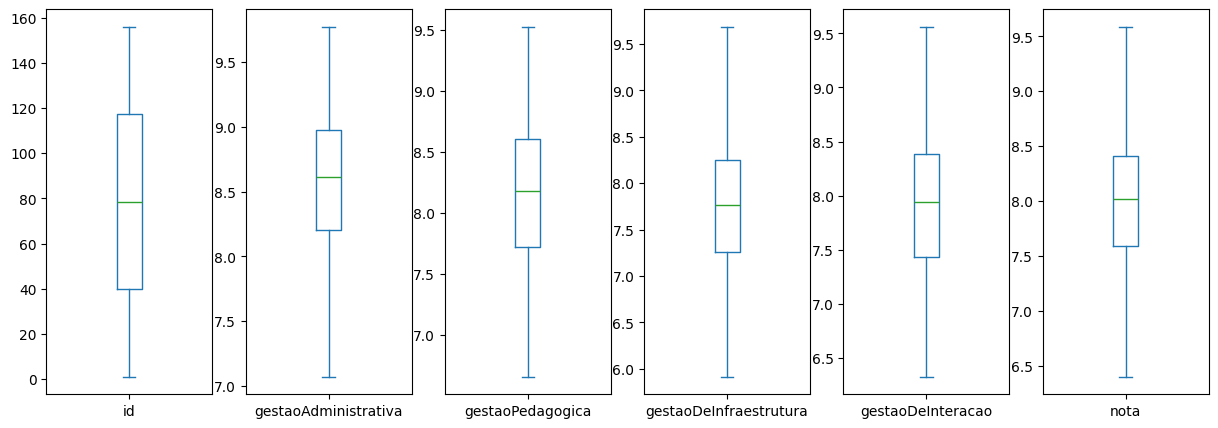

In [40]:
# box and whisker plots
df.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(15,5))
plt.show()

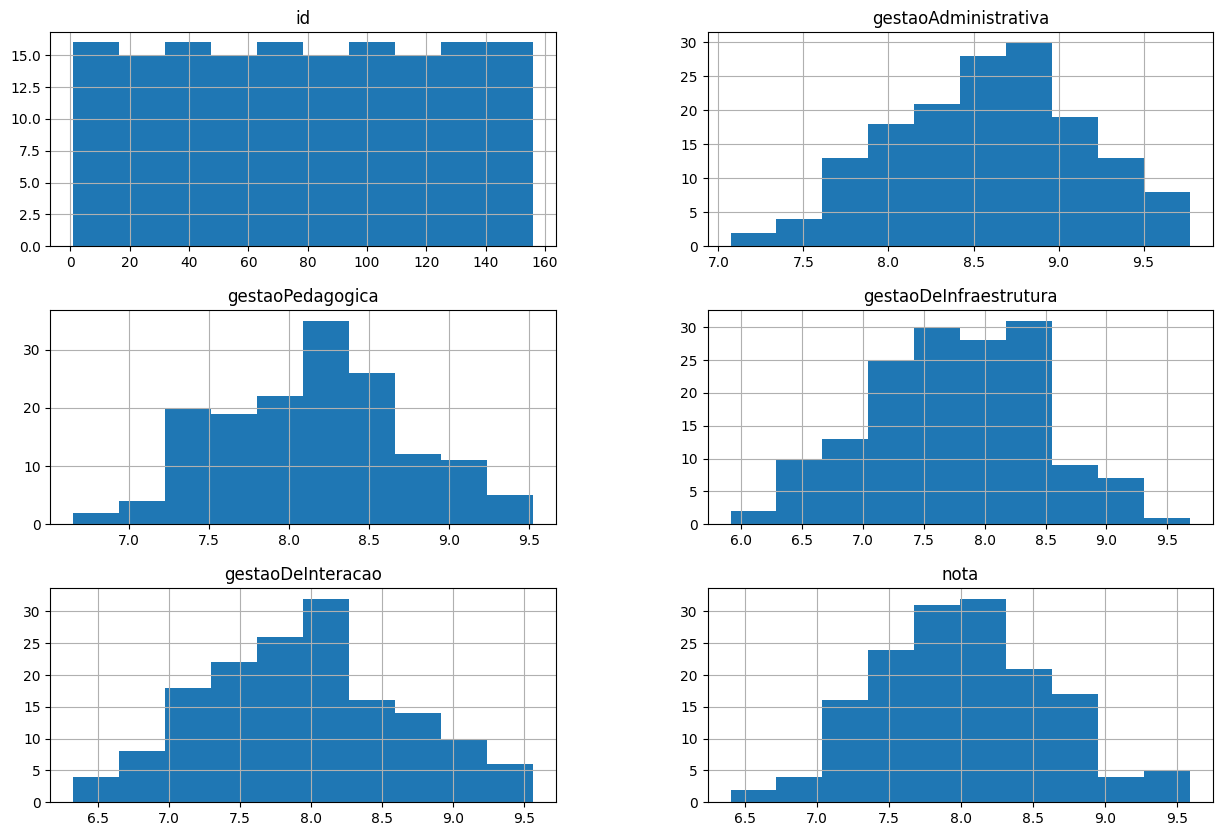

In [41]:
# histograms
df.hist(figsize=(15,10))
plt.show()

In [42]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import statsmodels.api as sm
#from pandas.tools.plotting import scatter_matrix

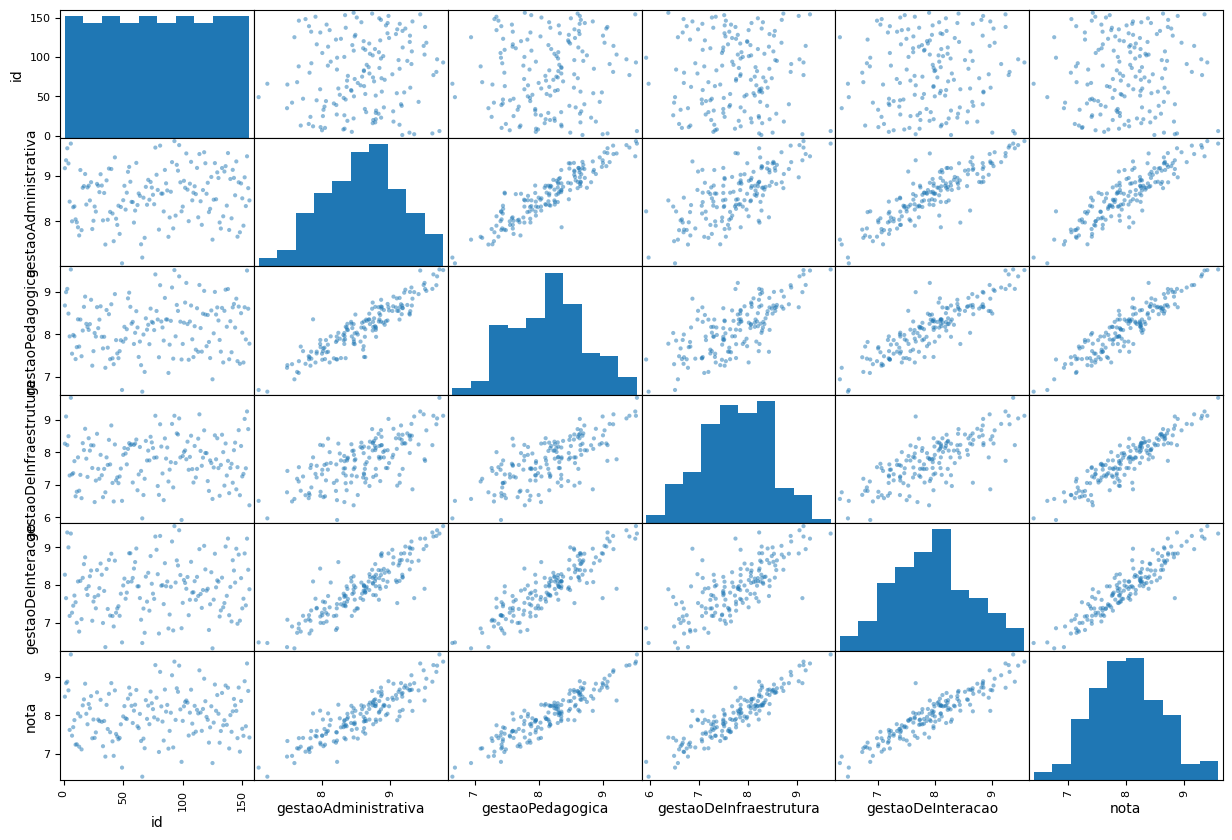

In [43]:
# scatter plot matrix
scatter_matrix(df,figsize=(15,10))
plt.show()

In [44]:
# Split-out validation dataset
array = df.values
X = array[:,3:8]
Y = array[:,1]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
print('Resultado do Training: ' + str(len(X_train)), 'Test: '+str(len(X_validation)))

Resultado do Training: 124 Test: 32


In [45]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [46]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
   cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring, error_score='raise')
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.234615 (0.135048)
LDA: 0.251923 (0.147130)
KNN: 0.186538 (0.137049)
CART: 0.105128 (0.081043)
NB: 0.130769 (0.100304)
SVM: 0.241667 (0.130840)


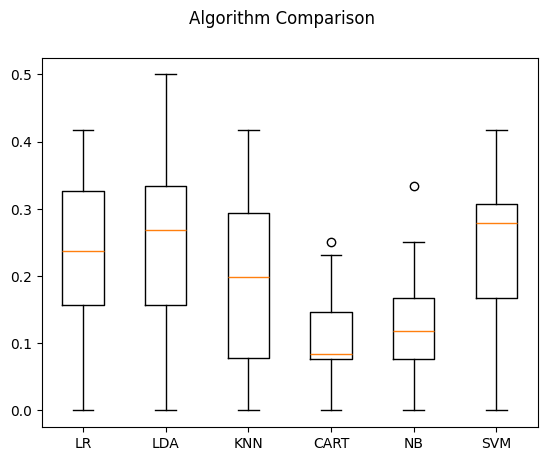

In [47]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [48]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.21875
[[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 1 0 6 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1]]
                          precision    recall  f1-score   support

             ALCINÓPOLIS       0.00      0.00      0.00         1
               ANASTÁCIO       0.00      0.00      0.00         1
            A

/home/bebeto/Documentos/Desenvolvimento/CienciaDeDados/modelo_machine_learning_vitae/.venv/lib64/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bebeto/Documentos/Desenvolvimento/CienciaDeDados/modelo_machine_learning_vitae/.venv/lib64/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bebeto/Documentos/Desenvolvimento/CienciaDeDados/modelo_machine_learning_vitae/.venv/lib64/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-def